# Solar Radiation Measurement

## Business Objective
The business objective is to identify high-potential regions for solar installation that align with the company's long-term sustainability goals. This requires analyzing environmental data to pinpoint areas where solar energy potential is highest, which will support data-driven decisions for future solar installations.


### Overview (Data Understanding)
Understanding the given datasets

In [410]:
#import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import os
import warnings
warnings.filterwarnings('ignore')


In [411]:
# import the CSV file 
# Define the path to the CSV file

file_path = 'C:/Users/zelalem.wubet/projects/personal/ten-academy/Solar-Radiation-Measurement/data/benin-malanville.csv'
data = pd.read_csv(file_path)


In [412]:
data.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [413]:
# print the no. of rows and no. of columns of the dataframe
data.shape

(525600, 19)

In [414]:
#It shows the name of each column
data.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [415]:
#Provides basic information about the dataframe.  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [416]:
#Find out all the Null Values in the data.
data.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

## Calculate Summary Statistics

In [417]:
data.describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.200000      28.800000       1.000000   
50%         4.300000      28.000000      55.100000       1.900000   
75%       447.900000      32.300000      80.100000       3.100000   
max      1342.300000      43.800000     100.000000      19.500000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        2.809195       0.473390     153.435172       8.582407   
std         2.029120       0.273395     102.332842       6.385864   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.400000      59.000000       3.700000   
50%         2.600000       0.500000     181.000000       8.600000   
75%         4.100000       0.600000     235.100000      12.300000   
max        26.600000       4.200000     360.000000      99.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      994.197199       0.000923       0.001905      35.246026   
std         2.474993       0.030363       0.037115      14.807258   
min       985.000000       0.000000       0.000000       9.000000   
25%       993.000000       0.000000       0.000000      24.200000   
50%       994.000000       0.000000       0.000000      30.000000   
75%       996.000000       0.000000       0.000000      46.900000   
max      1003.000000       1.000000       2.500000      81.000000   

               TModB  Comments  
count  525600.000000       0.0  
mean       32.471736       NaN  
std        12.348743       NaN  
min         8.100000       NaN  
25%        23.600000       NaN  
50%        28.900000       NaN  
75%        41.500000       NaN  
max        72.500000       NaN

## Data Quality Check

In [418]:
# Check for Missing Values:
data.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [419]:
# Check for Incorrect Entries
incorrect_entries = data[(data['GHI'] < 0) | (data['DNI'] < 0) | (data['DHI'] < 0) |
                       (data['ModA'] < 0) | (data['ModB'] < 0) | (data['WS'] < 0) | 
                       (data['WSgust'] < 0)]
print(incorrect_entries)


               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        WSstdev     WD  WDstdev   BP  C

In [420]:
# Identify Outliers
from scipy import stats
z_scores = np.abs(stats.zscore(data[['ModA', 'ModB', 'WS', 'WSgust']]))
outliers = data[(z_scores > 3).any(axis=1)]
print(outliers)

               Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
671     2021-08-09 11:12  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
674     2021-08-09 11:15  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
676     2021-08-09 11:17  1334.0  751.9  620.0  1267.3  1267.3  31.1  67.0   
850     2021-08-09 14:11  1324.0  813.0  532.3  1218.0  1217.0  31.0  62.9   
2958    2021-08-11 01:19    -1.2   -0.2   -0.6     0.0     0.0  23.5  94.9   
...                  ...     ...    ...    ...     ...     ...   ...   ...   
525141  2022-08-08 16:22     4.6   -0.1    4.6     6.1     5.9  21.9  99.0   
525142  2022-08-08 16:23     4.6    0.2    4.6     5.9     5.8  21.9  99.0   
525143  2022-08-08 16:24     4.5   -0.1    4.5     5.8     5.7  21.9  99.0   
525151  2022-08-08 16:32     4.7   -0.1    4.8     6.0     5.9  22.0  99.1   
525155  2022-08-08 16:36     4.8    0.0    4.9     6.0     5.9  22.0  99.1   

         WS  WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Pr

In [421]:
# Using IQR (Interquartile Range)
Q1 = data[['ModA', 'ModB', 'WS', 'WSgust']].quantile(0.25)
Q3 = data[['ModA', 'ModB', 'WS', 'WSgust']].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = data[((data[['ModA', 'ModB', 'WS', 'WSgust']] < (Q1 - 1.5 * IQR)) | 
                   (data[['ModA', 'ModB', 'WS', 'WSgust']] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(outliers_iqr)

               Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
671     2021-08-09 11:12  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
674     2021-08-09 11:15  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
676     2021-08-09 11:17  1334.0  751.9  620.0  1267.3  1267.3  31.1  67.0   
849     2021-08-09 14:10  1253.0  714.8  552.5  1156.0  1155.0  31.0  64.2   
850     2021-08-09 14:11  1324.0  813.0  532.3  1218.0  1217.0  31.0  62.9   
...                  ...     ...    ...    ...     ...     ...   ...   ...   
525151  2022-08-08 16:32     4.7   -0.1    4.8     6.0     5.9  22.0  99.1   
525152  2022-08-08 16:33     4.8    0.1    4.9     6.0     5.9  22.0  99.1   
525155  2022-08-08 16:36     4.8    0.0    4.9     6.0     5.9  22.0  99.1   
525156  2022-08-08 16:37     4.9    0.0    5.0     6.0     5.9  22.0  99.1   
525159  2022-08-08 16:40     4.9   -0.1    5.0     5.9     5.7  22.1  99.2   

         WS  WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Pr

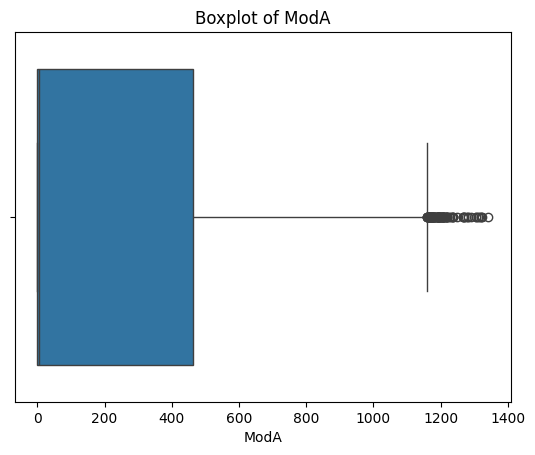

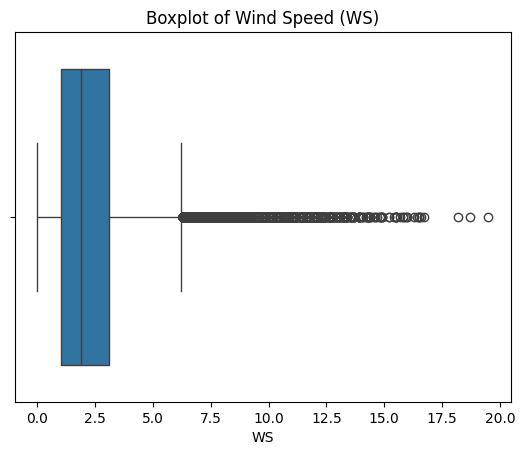

In [422]:
#Visualize Outliers (Optional)
sns.boxplot(x=data['ModA'])
plt.title('Boxplot of ModA')
plt.show()

sns.boxplot(x=data['WS'])
plt.title('Boxplot of Wind Speed (WS)')
plt.show()

## Time Series Analysis

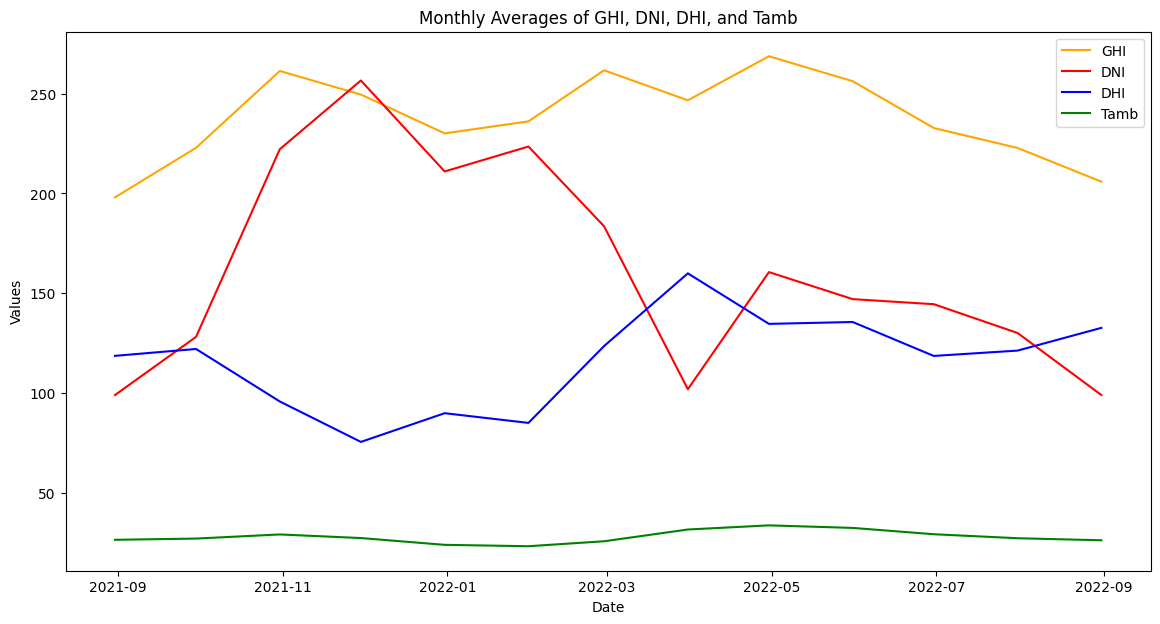

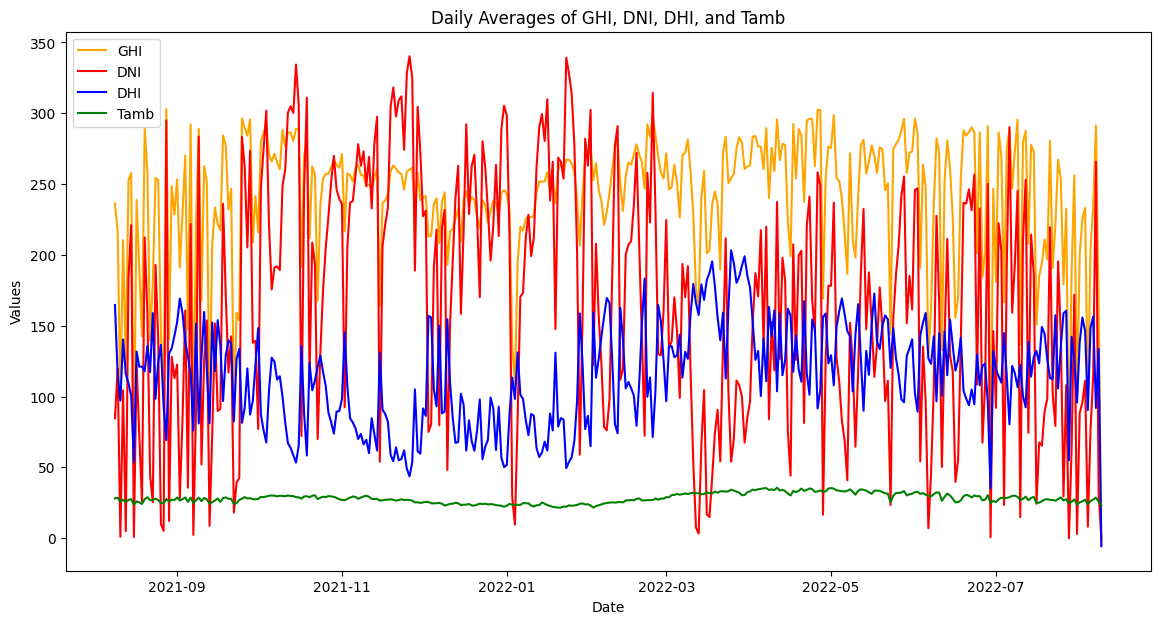

In [423]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.set_index('Timestamp', inplace=True)

monthly_data = data.resample('M').mean()  # Monthly average
daily_data = data.resample('D').mean()    # Daily average
hourly_data = data.resample('H').mean()   # Hourly average

# Plotting Monthly Data
plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index, monthly_data['GHI'], label='GHI', color='orange')
plt.plot(monthly_data.index, monthly_data['DNI'], label='DNI', color='red')
plt.plot(monthly_data.index, monthly_data['DHI'], label='DHI', color='blue')
plt.plot(monthly_data.index, monthly_data['Tamb'], label='Tamb', color='green')
plt.title('Monthly Averages of GHI, DNI, DHI, and Tamb')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

# Plotting Daily Data
plt.figure(figsize=(14, 7))
plt.plot(daily_data.index, daily_data['GHI'], label='GHI', color='orange')
plt.plot(daily_data.index, daily_data['DNI'], label='DNI', color='red')
plt.plot(daily_data.index, daily_data['DHI'], label='DHI', color='blue')
plt.plot(daily_data.index, daily_data['Tamb'], label='Tamb', color='green')
plt.title('Daily Averages of GHI, DNI, DHI, and Tamb')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

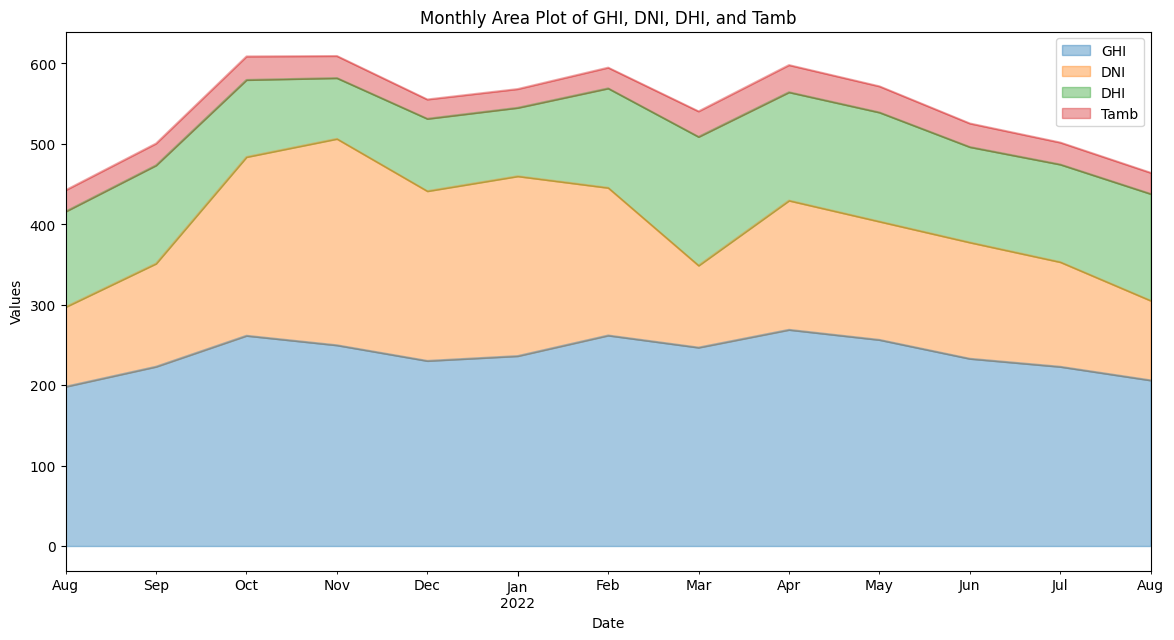

In [424]:
# Area Plot for Monthly Data
monthly_data[['GHI', 'DNI', 'DHI', 'Tamb']].plot.area(figsize=(14, 7), alpha=0.4)
plt.title('Monthly Area Plot of GHI, DNI, DHI, and Tamb')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()

# # Area Plot for Daily Data
# daily_data[['GHI', 'DNI', 'DHI', 'Tamb']].plot.area(figsize=(14, 7), alpha=0.4)
# plt.title('Daily Area Plot of GHI, DNI, DHI, and Tamb')
# plt.xlabel('Date')
# plt.ylabel('Values')
# plt.show()


## Correlation Analysis

In [425]:
correlation_matrix = data[['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']].corr()
print(correlation_matrix)


             GHI       DNI       DHI     TModA     TModB        WS    WSgust  \
GHI     1.000000  0.882376  0.849989  0.920127  0.874338  0.457349  0.484144   
DNI     0.882376  1.000000  0.546602  0.790340  0.756007  0.397099  0.419469   
DHI     0.849989  0.546602  1.000000  0.825012  0.777829  0.426959  0.450904   
TModA   0.920127  0.790340  0.825012  1.000000  0.983443  0.429899  0.458782   
TModB   0.874338  0.756007  0.777829  0.983443  1.000000  0.400509  0.430020   
WS      0.457349  0.397099  0.426959  0.429899  0.400509  1.000000  0.984599   
WSgust  0.484144  0.419469  0.450904  0.458782  0.430020  0.984599  1.000000   
WD      0.079664  0.018839  0.102752  0.164692  0.205442  0.238566  0.257456   

              WD  
GHI     0.079664  
DNI     0.018839  
DHI     0.102752  
TModA   0.164692  
TModB   0.205442  
WS      0.238566  
WSgust  0.257456  
WD      1.000000  


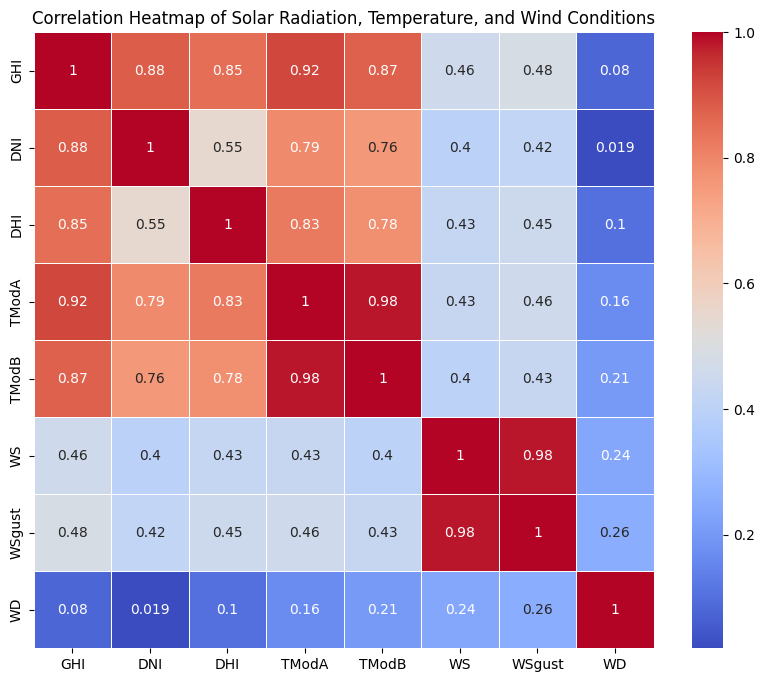

In [426]:
#Plot a Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Solar Radiation, Temperature, and Wind Conditions')
plt.show()

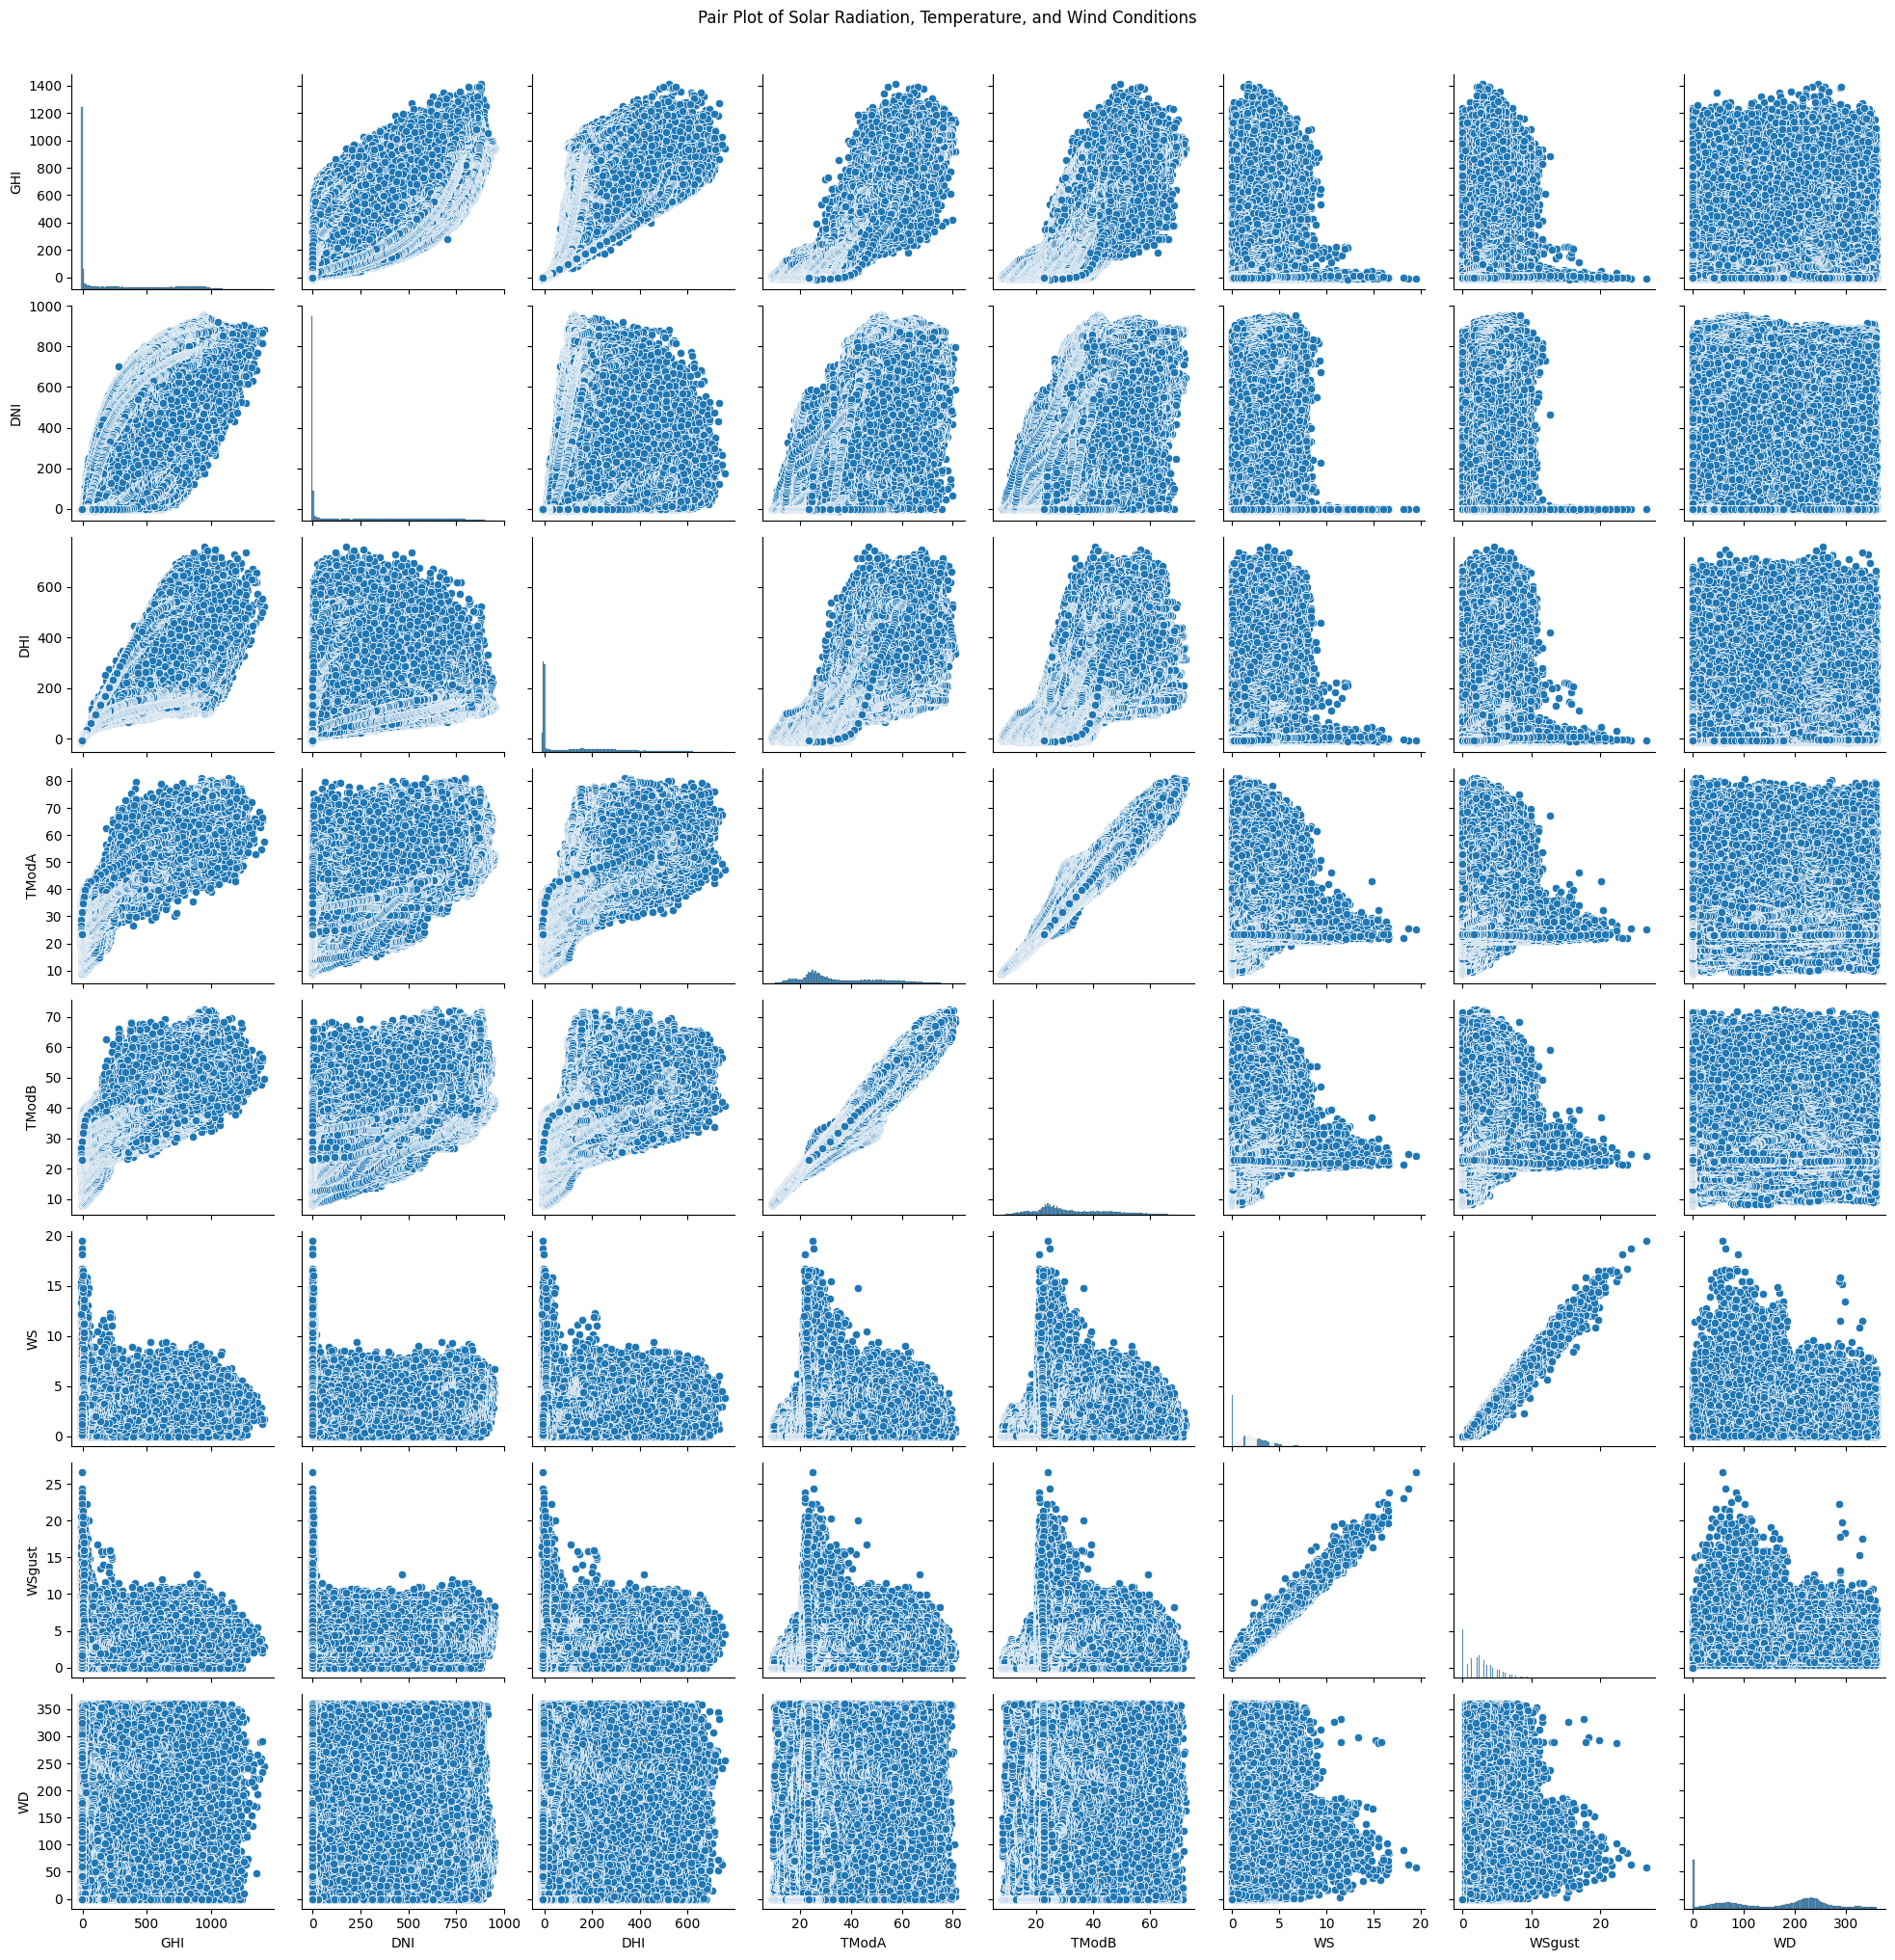

In [427]:
#Pair Plots
sns.pairplot(data[['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']])
plt.suptitle('Pair Plot of Solar Radiation, Temperature, and Wind Conditions', y=1.02)
plt.show()

In [428]:
# #Scatter Matrix for Wind Conditions and Solar Irradiance
# scatter_matrix(data[['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']], figsize=(12, 12), alpha=0.7, diagonal='kde')
# plt.suptitle('Scatter Matrix of Wind Conditions and Solar Irradiance', y=1.02)
# plt.show()

## 	Wind Analysis

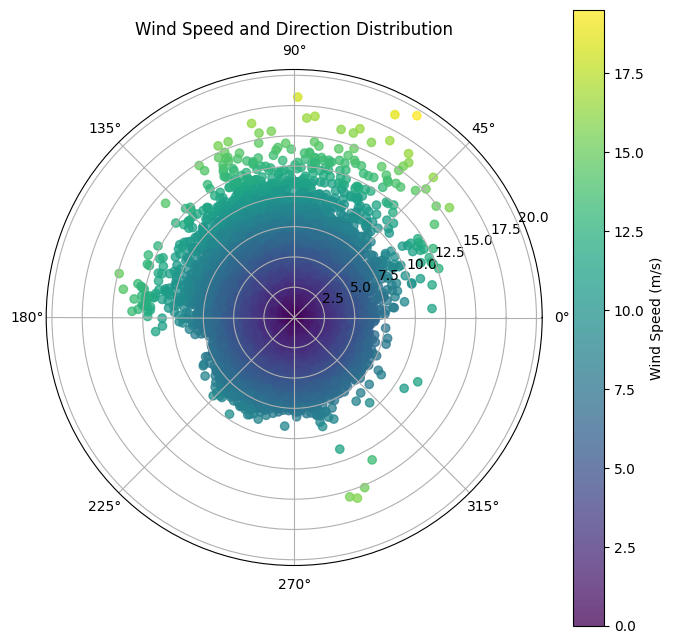

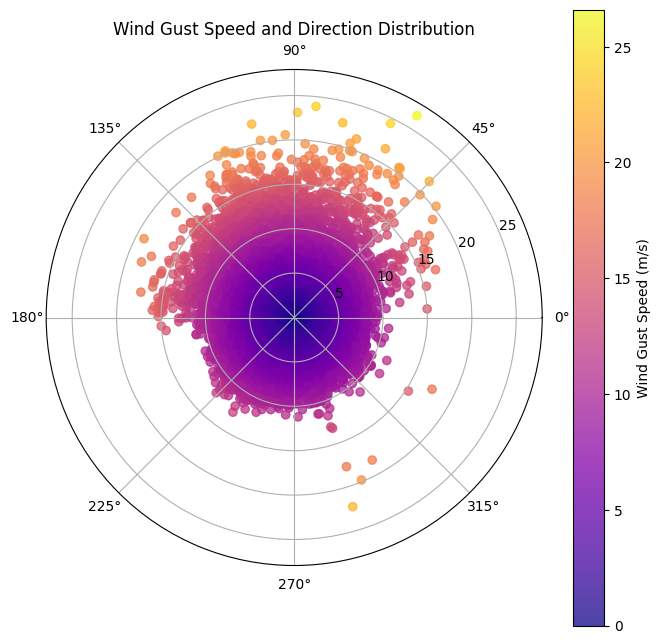

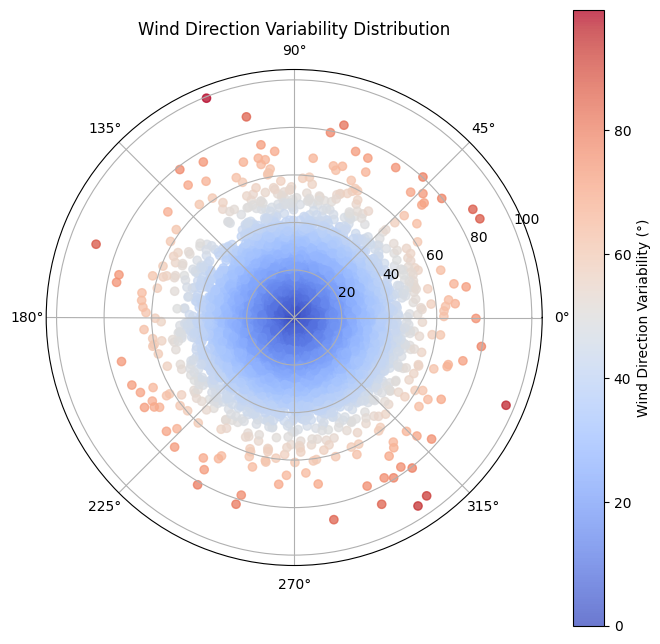

In [429]:
# Convert the wind direction (WD) from degrees to radians since polar plots in Matplotlib require angles in radians.
data['WD_radians'] = np.deg2rad(data['WD'])

#Create a Polar Plot for Wind Speed and Direction
plt.figure(figsize=(8, 8))
plt.subplot(projection='polar')
plt.scatter(data['WD_radians'], data['WS'], c=data['WS'], cmap='viridis', alpha=0.75)
plt.colorbar(label='Wind Speed (m/s)')
plt.title('Wind Speed and Direction Distribution')
plt.show()


# Plot Wind Gusts
plt.figure(figsize=(8, 8))
plt.subplot(projection='polar')
plt.scatter(data['WD_radians'], data['WSgust'], c=data['WSgust'], cmap='plasma', alpha=0.75)
plt.colorbar(label='Wind Gust Speed (m/s)')
plt.title('Wind Gust Speed and Direction Distribution')
plt.show()

#Analyze Wind Direction Variability
plt.figure(figsize=(8, 8))
plt.subplot(projection='polar')
plt.scatter(data['WD_radians'], data['WDstdev'], c=data['WDstdev'], cmap='coolwarm', alpha=0.75)
plt.colorbar(label='Wind Direction Variability (°)')
plt.title('Wind Direction Variability Distribution')
plt.show()
